In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Binarizer

from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc

In [4]:
df = pd.read_csv('income_classification.csv')

In [5]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [6]:
df.columns

Index(['age', ' workclass', ' fnlwgt', ' education', ' education-num',
       ' marital-status', ' occupation', ' relationship', ' race', ' sex',
       ' capital-gain', ' capital-loss', ' hours-per-week', ' native-country',
       ' income'],
      dtype='object')

In [7]:
df.shape

(32561, 15)

In [8]:
new =[]
for item in list(df.columns):
    item = item.strip()
    new.append(item)
    
df.columns = new
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [9]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [10]:
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [11]:
def mode(list_of_nums):
    average = list_of_nums.mode()
    return average

categorical_var = list(df.select_dtypes(include=object).columns)

for item in categorical_var:
    print(item + " mode: "+ mode(df[item]))
    

0    workclass mode:  Private
dtype: object
0    education mode:  HS-grad
dtype: object
0    marital-status mode:  Married-civ-spouse
dtype: object
0    occupation mode:  Prof-specialty
dtype: object
0    relationship mode:  Husband
dtype: object
0    race mode:  White
dtype: object
0    sex mode:  Male
dtype: object
0    native-country mode:  United-States
dtype: object
0    income mode:  <=50K
dtype: object


In [12]:
df.isnull().sum()


age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

In [13]:
for item in categorical_var:
    print(item + ":")
    print(df[item].unique())

workclass:
[' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 ' ?' ' Self-emp-inc' ' Without-pay' ' Never-worked']
education:
[' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' 1st-4th' ' Preschool' ' 12th']
marital-status:
[' Never-married' ' Married-civ-spouse' ' Divorced'
 ' Married-spouse-absent' ' Separated' ' Married-AF-spouse' ' Widowed']
occupation:
[' Adm-clerical' ' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty'
 ' Other-service' ' Sales' ' Craft-repair' ' Transport-moving'
 ' Farming-fishing' ' Machine-op-inspct' ' Tech-support' ' ?'
 ' Protective-serv' ' Armed-Forces' ' Priv-house-serv']
relationship:
[' Not-in-family' ' Husband' ' Wife' ' Own-child' ' Unmarried'
 ' Other-relative']
race:
[' White' ' Black' ' Asian-Pac-Islander' ' Amer-Indian-Eskimo' ' Other']
sex:
[' Male' ' Female']
native-country:
[' United-States' ' Cuba' ' Jamaica' ' 

In [15]:
df['workclass'].replace(' ?', ' Unknown',inplace=True)
df['occupation'].replace(' ?', ' Unknown',inplace=True)
df['native-country'].replace(' ?', ' Unknown',inplace=True)

In [16]:
numerical_var = list(df.select_dtypes(exclude=object).columns)

Text(0.5, 0, 'Workclass Types')

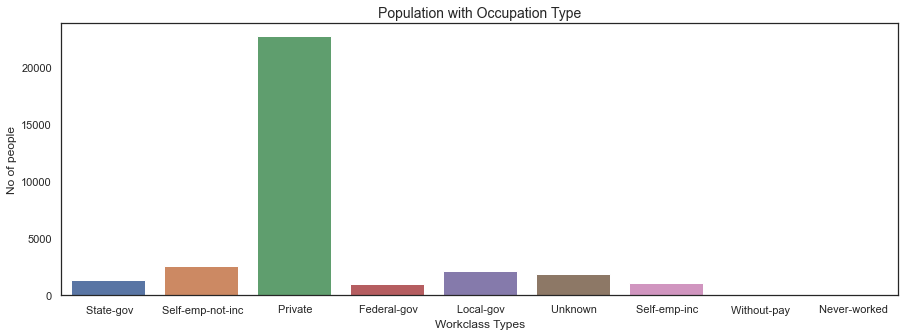

In [18]:
plt.figure(figsize=(15,5))
sns.set(style = 'white')
sns.countplot(x="workclass", data=df)
plt.title("Population with Occupation Type",size =14)
plt.ylabel("No of people")
plt.xlabel("Workclass Types")

Text(0.5, 0, 'Education Level')

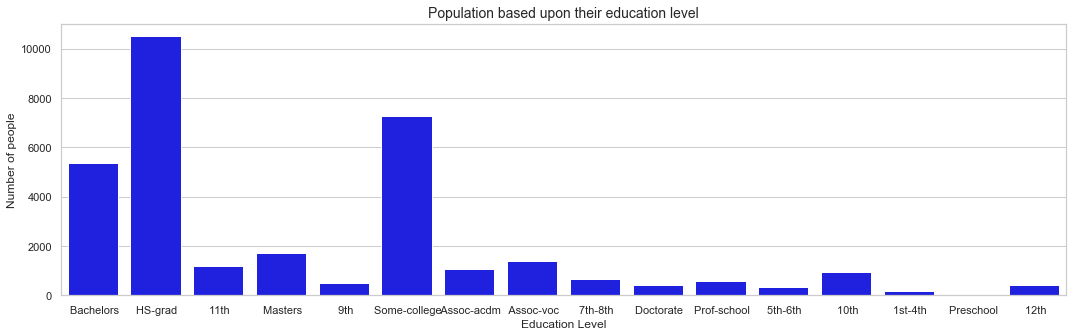

In [19]:
plt.figure(figsize=(18,5))
sns.set(style = 'whitegrid')
sns.countplot(x="education", data=df,color='blue')
plt.title("Population based upon their education level",size=14)
plt.ylabel("Number of people")
plt.xlabel("Education Level")

In [20]:
array = df[numerical_var].values
scaler = StandardScaler().fit(array)
df[numerical_var] = pd.DataFrame(scaler.transform(array))

In [21]:
df[numerical_var].head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
0,0.030671,-1.063611,1.134739,0.148453,-0.21666,-0.035429
1,0.837109,-1.008707,1.134739,-0.145920,-0.21666,-2.222153
2,-0.042642,0.245079,-0.420060,-0.145920,-0.21666,-0.035429
3,1.057047,0.425801,-1.197459,-0.145920,-0.21666,-0.035429
4,-0.775768,1.408176,1.134739,-0.145920,-0.21666,-0.035429


In [22]:
categorical_var = list(set(df.dtypes[df.dtypes==object].index) - set(['income']))

#Creating dummy variables 
dummy = pd.get_dummies(df[categorical_var],drop_first=True)
df=df.drop(categorical_var,axis=1)
df=pd.concat([df,dummy],axis = 1)

In [23]:
dummy = pd.get_dummies(df['income'],drop_first=True)
df=df.drop('income',axis=1)
df=pd.concat([df,dummy],axis = 1)

In [24]:
df.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,...,occupation_ Sales,occupation_ Tech-support,occupation_ Transport-moving,occupation_ Unknown,sex_ Male,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,>50K
0,0.030671,-1.063611,1.134739,0.148453,-0.21666,-0.035429,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,0.837109,-1.008707,1.134739,-0.145920,-0.21666,-2.222153,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2,-0.042642,0.245079,-0.420060,-0.145920,-0.21666,-0.035429,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0
3,1.057047,0.425801,-1.197459,-0.145920,-0.21666,-0.035429,0,0,1,0,...,0,0,0,0,1,0,1,0,0,0
4,-0.775768,1.408176,1.134739,-0.145920,-0.21666,-0.035429,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0


In [25]:
df[' >50K'].value_counts()

0    24720
1     7841
Name:  >50K, dtype: int64

In [33]:
from imblearn. over_sampling import SMOTE
os= SMOTE(random_state=0)
input_var = list(set(df.columns)-set([' >50K']))



X,Y = os.fit_sample(df[input_var],df[' >50K'])


X=pd.DataFrame(X,columns=input_var)
Y = pd.DataFrame(Y,columns = [' >50K'])



df = pd.concat([X,Y],axis = 1)

In [34]:
#renaming dependent variable to income
df.rename(columns={' >50K':'income'},inplace=True)

In [35]:
input_var  = set(df.columns) - set(['income'])
X = df[input_var]
Y = df['income']

models = ['LogisticReg', 'DecisionTree', 'RandomForest', 'KNN','Support Vector Machine','Neural Networks']

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

In [43]:
lr = LogisticRegression(random_state=0, solver='lbfgs', multi_class='ovr',max_iter=1000) # creates a lR instance
lr.fit(X_train, Y_train)

LogisticRegression(max_iter=1000, multi_class='ovr', random_state=0)

In [38]:
dt = DecisionTreeClassifier(criterion = 'gini', splitter='best', max_depth=15)
dt.fit(X_train, Y_train)

DecisionTreeClassifier(max_depth=15)

In [39]:
rf = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=0)
rf.fit(X_train, Y_train)

RandomForestClassifier(max_depth=5, random_state=0)

In [40]:
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, Y_train)

KNeighborsClassifier()

In [46]:
SVM = svm.LinearSVC(dual=False)
SVM.fit(X_train, Y_train)

LinearSVC(dual=False)

In [51]:
NN = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1,max_iter=100000)
NN.fit(X_train, Y_train)

MLPClassifier(alpha=1e-05, hidden_layer_sizes=(5, 2), max_iter=100000,
              random_state=1, solver='lbfgs')

In [52]:
pred_Y_lr = lr.predict(X_test) # predicts the Y for model lr

pred_Y_dt = dt.predict(X_test) # predicts the Y for model dt

pred_Y_rf = rf.predict(X_test) # predicts the Y for model rf

pred_Y_knn = knn.predict(X_test) # predicts the Y for model knn

pred_Y_svm = SVM.predict(X_test) # predicts the Y for model Support Vector Machines

pred_Y_nn = NN.predict(X_test) # predicts the Y for model Neural Networks

In [53]:
def get_performances(actual_Y, pred_Y):
    cm = confusion_matrix(actual_Y, pred_Y.round())
    total = sum(sum(cm))
    accuracy = (cm[0,0]+cm[1,1])/total
    return accuracy

In [55]:
accuracy_lr = get_performances(Y_test, pred_Y_lr)

accuracy_dt = get_performances(Y_test, pred_Y_dt)

accuracy_rf = get_performances(Y_test, pred_Y_rf)

accuracy_knn = get_performances(Y_test, pred_Y_knn)

accuracy_svm = get_performances(Y_test, pred_Y_svm)

accuracy_nn = get_performances(Y_test, pred_Y_nn)

In [57]:
results = pd.DataFrame([accuracy_lr, accuracy_dt,accuracy_rf,accuracy_knn,accuracy_svm,accuracy_nn], 
                    columns = ['accuracy'], 
                    index = ['Logistic Regression',
                             'Decision Trees', 'Random Forest','K-NN','Support Vector Machine','Neural Networks'])
results

,accuracy
Logistic Regression,0.848799
Decision Trees,0.849166
Random Forest,0.807735
K-NN,0.853089
Support Vector Machine,0.847634
Neural Networks,0.857318
